# Early OTE Commissioning Guiding PSF Analysis

During the 5 OTE-CARs that precede LOS-02, the WF Guiding team will do periodic checks of the PSFs and determine if there are any concerns for guiding in LOS-02. This notebook will walk through OTE-01, OTE-02, OTE-03, OTE-04, and OTE-06 analysis. We do not expect analysis of OTE-05 to be necessary. We focus on PSF shapes and how many "guideable" segment PSFs we have at each stage. 

As each step is completed, please communicate a summary of what you have found to WF Ops via email or over the loops during a non-busy time in commissioning. 

*It is very important to provide WF Ops with an update if you think the number of "guidable" segment PSFs is less than 6 prior to OTE-03.*

# Table of Contents
1. [Overview of products from Shadow](#Overview-of-the-products-we-can-expect-from-Shadow-and-others)
2. [Overview of each CAR](#Overview-of-each-CAR) 
3. [After OTE-01](#After-OTE-01)
4. [After OTE-02](#After-OTE-02)
5. [After OTE-03](#After-OTE-03)
6. [After OTE-04](#After-OTE-04)
7. [After OTE-06](#After-OTE-06)

In [7]:
import os

from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.colors import from_levels_and_colors
from matplotlib import cm
import numpy as np
import pandas as pd

import notebook_utils
from notebook_utils import SEGMENTS, GA_PSF_LOCATIONS
from jwst_magic import convert_image

%matplotlib inline

# Overview of the products we can expect from Shadow and others 

### What you will expect to have from WSS Shadow
1. Path to the mosaic
2. Txt file that includes: 
    - ra_txt: RA in HH:MM:SS
    - dec_txt: Dec in HH:MM:SS
    - equinox: 
    - x: X location of the PSF in the mosaic image
    - y: Y location of the PSF in the mosaic image
    - fwhm: The average FWHM of the PSF
    - fwhm_x: FWHM of the PSF in the X direction
    - fwhm_y: FWHM of the PSF in the Y direction
    - starsize: The average FWHM in arcseconds
    - ellipse: 0 - 1 where 0 is more elliptical, and 1 is more circular
    - background: 
    - skylevel: 
    - brightness: 
    - time_local: Local time of observation
    - time_ut: UTC time of observation 
    - ra_deg: RA in degrees
    - dec_deg: Dec in degrees
3. A general idea of the location of the target star in the mosaic image

# Overview of each CAR

## OTE-01: Initial Image Mosiac

OTE-01 is the initial image mosaic and its goal is to find the 18 segments. 

There will be a range of focus for the PSFs, some will be close to focus, some will be out of focus. This will cause several of the segment PSFs to be saturated because, by requirement, the target star should be very bright and isolated. If a PSF is not saturated, it likely has a large defocus. The closer to focus, more saturation is expected. 

After finding the segments we define an initial offset given by a rough estimate of the center of the PMSA deployment. We can inspect the shape of the PSFs by looking at the fainter background stars. 

We will have some idea of the shape of the PSF but no idea of any of the segments' identifications. 

**Note: WSS Shadow downsamples the detector images for the mosaic** but we do have the normal DMS images, so Shadow can give you the name of the DMS file that has the segments for a not downsampled option.

#### Shadow will provide:
 - End of OTE-01 mosaic path (will be available in the `/data/...` directory in SOGS)
 - Associated pick_log.txt file from QUIP **if time allows**

[Go to OTE-01 analysis section](#After-OTE-01)

## OTE-02: Alignment Matrix 1

WSS/WSS Shadow will use the OTE-01 initial mosaic offset from the expected target to do the first telescope correction for OTE-02, so that it points roughy to the center of the initial deployment. 

For OTE-02 we have NIRCam A and ALL images, so we should have a partial view of the initial deployment (not mosaic) but these should have few, if any, saturated PSFs. Saturation in any of the PSFs will imply that the defocus is too large between all segments)]. 

The process for OTE-01 and OTE-02  for WF Guiding will be the same. Both OTE-01 and OTE-02 images are expected to have high backgrounds.

#### Shadow will provide:
 - End of OTE-02 NRCALL path (will be available in the `/data/...` directory in SOGS)
 - Associated pick_log.txt file from QUIP **if time allows**
 - Any information from any discussions regarding PSF quality dicussed in the WF office **if time allows**

[Go to OTE-02 analysis section](#After-OTE-02)

## OTE-03: Secondary Mirror Focus Sweep 

**0TE-03 is optional, but likely to occur.** 

During OTE-03, the secondary mirror will be moved 100um in either direction in order to find the best focus for the segment PSFs that are visible in the field.

We will have the NRCALL exposure, as with OTE-02, with as many segments in the field as possible. At the end of OTE-03 we might have a tentative segment ID and should have better (or more compact) PSFs for guiding.

WF Guiding should have recieved a DAN regarding any OTE-03 data.

#### Shadow will provide:
 - pick_log.txt from QUIP, completed on the last image **if time allows**
 - Any idea regarding which segment PSF is which. There will be a formal list somewhere, in a PNG (will be avilable on a pring out or in `/data/…`)

[Go to OTE-03 analysis section](#After-OTE-03)

## OTE-04: Segment ID

At the end of OTE-04 we should have the ID of each segment, with images of all the segment PSFs. The only caveat is that some segments may be on top or close to each other, thus, some contamination could affect the PSF measurements.

As this point, WF Guiding should be able to make a fake large image array image that can be run through MAGIC and DHAS. All successful guide/reference star configurations, should be recorded.

#### Shadow will provide:
 - Which segment is which in either an OTE-04 image printout or online. Format and communication is unclear (will be avilable on a print out or in `/data/…`)


[Go to OTE-04 analysis section](#After-OTE-04)

## OTE-05: Alignment Matrix 2

OTE-05 is similar to OTE-02.

We do not expect to have any new information from OTE-05 that can help WF Guiding prepare for LOS-02, so no analysis will be done. 

## OTE-06: Segment Image Array 1

During OTE-06, WSS forms the large array in NIRCam A3. At the end of OTE-06 we'll have the same configuration and PSF as in LOS-02 and the first exposure of OTE-07. This is also a good time to do a full PSF characterization in preparation for Guiding.

#### Shadow will provide:
 - pick_log.txt from QUIP, completed on the last image **if time allows**


[Go to OTE-06 analysis section](#After-OTE-06)

# After OTE 01 

<font color='Tomato'> <div style='background-color: rgba(255, 99, 71, 0.3)'><center> 
##    
## Make sure the following parameters are correct
##    
</center></div></font>

In [8]:
# CAR information
car = 'OTE-01'
program_id = 1134

In [9]:
# Directory where the files can be found
main_directory = '/ifs/jwst/tel/TeamPractices/'

# Path to the OTE-01 mosaic
sw_mosaic = os.path.join(main_directory, f'{car}/mosaic0_obs1-2_median_sub_gbrady_05032021.fits')#'OTE-01/Ball_Deployment-2/WARM/output/mosaic0_quip.fits')

# Location of the file exported from QUIP
# If no file is provided, set variable equal to None
info_from_shadow = '/Users/kbrooks/Desktop/pick_log.txt' # None

# Define location of the target in the image
# If no location is provided, set variable equal to None
target_location = None #(4000, 6000)

<font color='DodgerBlue'> <div style='background-color: rgba(30, 144, 255, 0.3)'><center> 
##    
## Run the following cells without changing them
##    
</center></div></font>

In [10]:
# Open image
image = fits.getdata(sw_mosaic)

# Correct negative pixels
image[image<=0] = 3e-20

In [15]:
# Load file
if info_from_shadow is not None:
    print(f'Creating the information table from {info_from_shadow}')
    info_df = notebook_utils.read_shadow_log(info_from_shadow, params_to_include=['x', 'y', 'fwhm', 'fwhm_x', 
                                                                                  'fwhm_y', 'ellipse', 
                                                                                  'background', 'skylevel'])
else:
    print(f'Creating the information table from the X and Y values calcualted using MAGIC')
    x_list, y_list = notebook_utils.get_position_from_magic(image)
    info_dict = {i:{'x':x, 'y':y} for i, (x, y) in enumerate(x_list, y_list)}
    info_df = pandas.dataframe(data=info_dict)
        

Creating the information table from /Users/kbrooks/Desktop/pick_log.txt


In [16]:
info_df

,x,y,fwhm,fwhm_x,fwhm_y,ellipse,background,skylevel
0,3183.122917,6682.173009,17.486145,7.064045,23.698730,0.298077,8.565116,48.993372
1,3734.581458,6548.935658,8.621786,9.454321,7.699754,0.814416,12.210975,52.821523
2,3699.249464,6281.197796,14.495469,13.376130,15.534361,0.861067,10.530105,51.056610
3,4008.829903,6889.956856,12.208638,15.344006,7.916006,0.515902,7.605209,47.985470
4,4598.353512,6856.156425,12.127656,14.670776,8.884167,0.605569,8.297906,48.712802
5,4846.137409,6160.521621,13.314526,13.602824,13.019846,0.957143,9.285214,49.749475
6,4173.948920,5768.065227,20.724278,24.147565,16.609832,0.687847,22.563337,63.691504
7,4183.948593,5631.367309,12.303161,6.628720,16.087126,0.412051,17.592253,58.471865
8,4462.618462,6234.218139,21.980427,20.928984,22.983820,0.910596,69.826721,113.318057
9,4430.374239,6149.924094,23.889754,23.315321,24.450695,0.953565,97.929771,142.826260


In [17]:
# Set target location by averaging the PSF positions if not given by shadow
if target_location is None:
    target_x = np.median(info_df['x'].values)
    target_y = np.median(info_df['y'].values)
    target_location = (int(target_x), int(target_y))

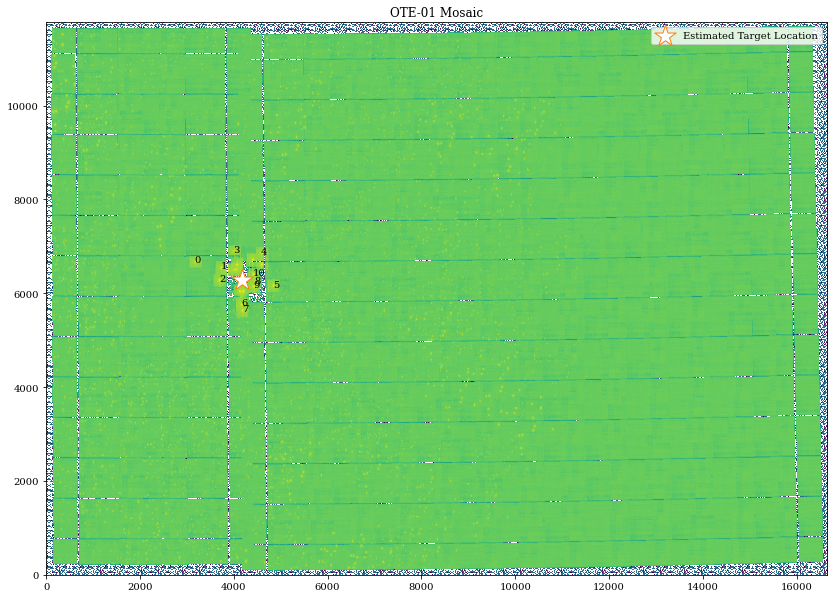

In [20]:
# Plot the full mosaic with the estimated target location and identified PSFs
notebook_utils.plot_mosaic_with_psfs(image, car, info_df['x'].values, info_df['y'].values, 
                                     target_location, xlim=None, ylim=None)

<font color='Tomato'> <div style='background-color: rgba(255, 99, 71, 0.3)'><center> 
##    
## Update the next cell (only) as needed
##    
</center></div></font>

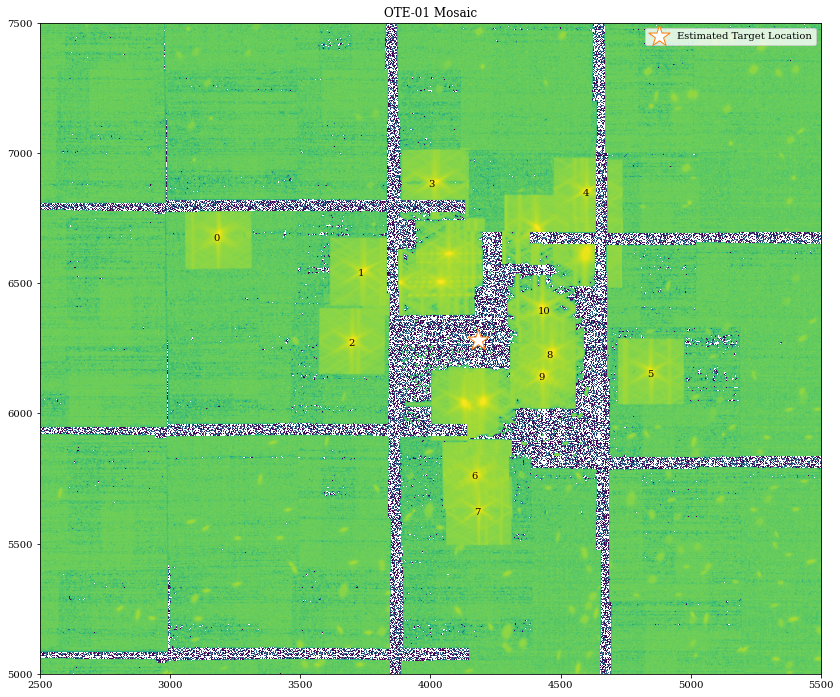

In [21]:
# Update the xlim and ylim values to zoom in on the set of PSFs of interest

xlim = (2500, 5500)
ylim = (5000, 7500)


# Zoom in on the identified PSFs
notebook_utils.plot_mosaic_with_psfs(image, car, info_df['x'].values, info_df['y'].values, 
                                     target_location, xlim=xlim, ylim=ylim)

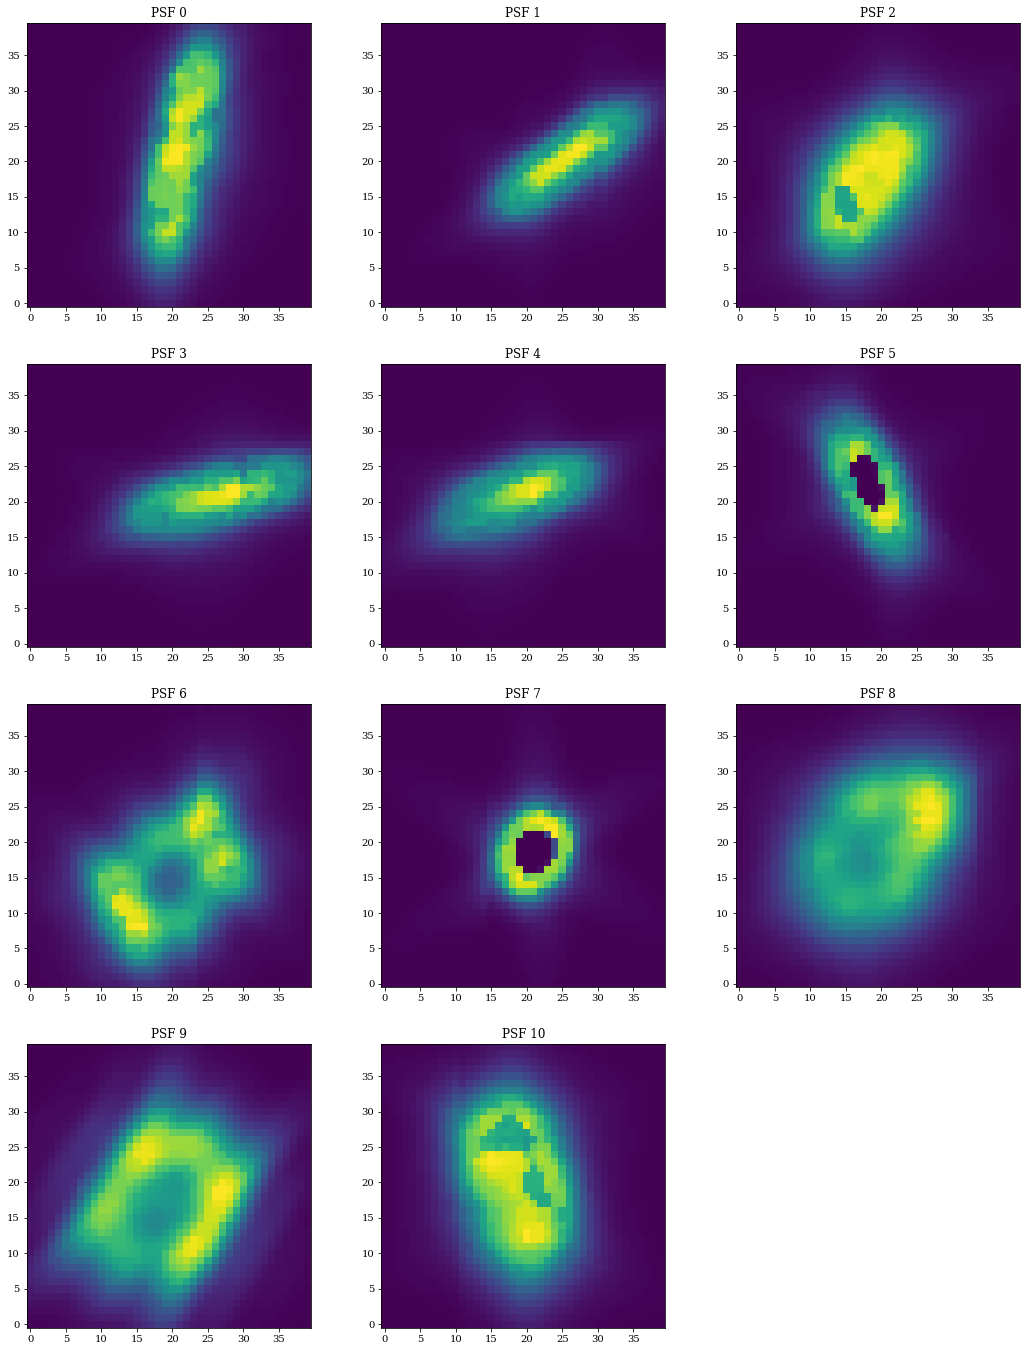

In [23]:
# Cut out each segment and do a visual check
# Change the size of the postage stamp cut out, by adjusting the window_size value which is the size of one side
notebook_utils.plot_each_identified_segment_psf(image, car, info_df['x'].values, info_df['y'].values, 
                                                window_size=40, num_psf_per_row=4)

### Things to look for:
- How many segment PSFs are saturated (zeros in the center of the PSF)?
- Is there a single birght spot in the PSF or are there multiple knots/lobes?


<font color='Tomato'> <div style='background-color: rgba(255, 99, 71, 0.3)'><center> 
##    
## Update the next cell (only) as needed
##    
</center></div></font>

In [28]:
# Which PSFs (list their number from the plots) would you consider guidable based on a visual inspection?
by_eye_good_inds = [1, 3, 4, 5, 7]

## Look at FWHM and Ellipticty values provided by Shadow 

In [29]:
# Make a PSF location dictionary
info_dictionary = info_df.to_dict(orient='index')

### First look at FWHM and Ellipticity 

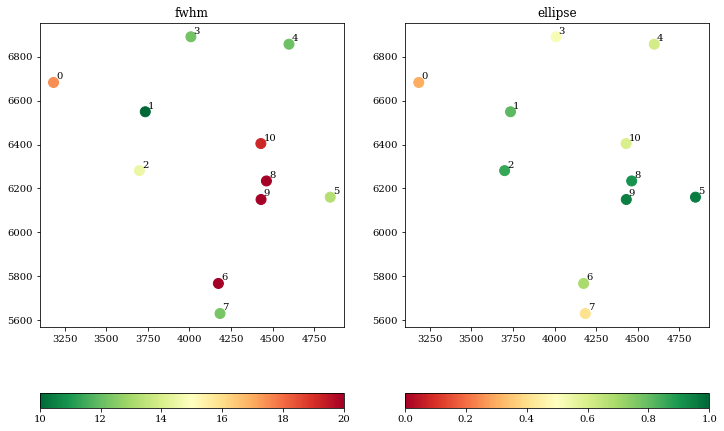

In [30]:
notebook_utils.plot_multiple_parameters(['fwhm', 'ellipse'], info_dictionary)

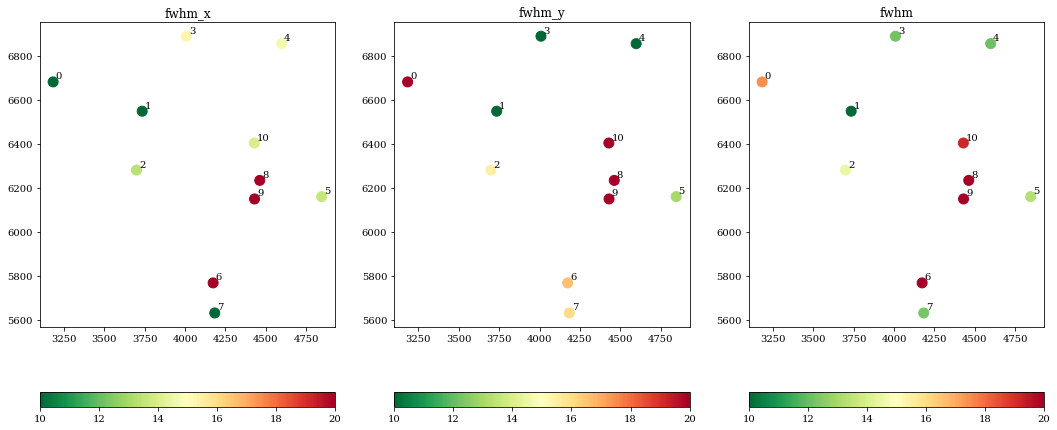

In [31]:
# Look at FWHM x and y (though the images should tell you the same information)
notebook_utils.plot_multiple_parameters(['fwhm_x', 'fwhm_y', 'fwhm'], info_dictionary)

Tally up how many of the above PSFs that are in the green for both FWHM and ellipse: 5 

### Using FWHM and Ellipticity, find best PSFs 

In [32]:
# Indices of the better PSFs: 
# Change these values as needed
fwhm_limit = 15
ellipse_limit = 0.4 #TODO: Figure out if 0 or 1 is more circular - this is completely not clear from these PSFs

good_inds = []
for key in info_dictionary.keys():
    if info_dictionary[key]['fwhm'] < fwhm_limit and info_dictionary[key]['ellipse'] > ellipse_limit:
        good_inds.append(key)


In [33]:
good_inds

[1, 2, 3, 4, 5, 7]

### Compare "by eye" good PSFs to programmatic good PSFs 

In [38]:
good = list(set(by_eye_good_inds) & set(good_inds))

In [39]:
good

[1, 3, 4, 5, 7]

If the number of "Good" PSFs is more than, or equal to 6, then we can feel confident that we can get a guiding scenario. If it is less than 6, then we will need OTE-03

In [126]:
if len(good) < 6:
    print(f'We only have {len(good_inds)} PSFs that we think are good enough for guiding. We need more than 6.')
else:
    print(f'We have {len(good_inds)} PSFs that we think are good enough for guiding, which might be enough.')

We have 10 PSFs that we think are good enough for guiding, which might be enough.


# After OTE 02

*Do the same analysis that you did after OTE-01, just with the image of the partial deployment*

<font color='Tomato'> <div style='background-color: rgba(255, 99, 71, 0.3)'><center> 
##    
## Make sure the following parameters are correct
##    
</center></div></font>

In [43]:
# CAR information
car = 'OTE-02'
program_id = 1135

In [93]:
# Directory where the files can be found
main_directory = '/ifs/jwst/tel/TeamPractices/'

# Location of the NRCALL image with most segments
partial_view_of_deployment = os.path.join(main_directory, f'{car}/output/mosaic0_OTE-02-Obs1+2-SW.fits')

# Location of the file exported from QUIP
# If no file is provided, set variable equal to None
info_from_shadow = None

# Define location of the target in the image
# If no location is provided, set variable equal to None
target_location = None

<font color='DodgerBlue'> <div style='background-color: rgba(30, 144, 255, 0.3)'><center> 
##    
## Run the following cells without changing them
##    
</center></div></font>

In [86]:
# Open image
image = fits.getdata(partial_view_of_deployment)

# Correct negative pixels
image[image<=0] = 3e-20
image[image>65000] = 65000

In [88]:
# Load file
if info_from_shadow is not None:
    print(f'Creating the information table from {info_from_shadow}')
    info_df = notebook_utils.read_shadow_log(info_from_shadow, params_to_include=['x', 'y', 'fwhm', 'fwhm_x', 
                                                                                  'fwhm_y', 'ellipse', 
                                                                                  'background', 'skylevel'])
else:
    print(f'Creating the information table from the X and Y values calculated using MAGIC')
    x_list, y_list = notebook_utils.get_position_from_magic(image, smoothing='high')
    if not x_list:
        info_dict = None
        info_df = None
    else:
        info_dict = {'x': x_list, 'y': y_list}
        info_df = pd.DataFrame(data=info_dict)

Creating the information table from the X and Y values calculated using MAGIC


2021-11-16 16:49:37,907 - stpipe - WARNING - Could not accurately map labels to segments. It will not be possible to run fsw_file_writer.rewrite_prc using the all_found_psfs*.txt file generated here.


In [89]:
info_df

,x,y
0,471,152
1,972,152
2,1225,441
3,1838,596
4,1621,598
5,2306,608
6,2148,613
7,1197,761
8,1316,818
9,1436,824


In [94]:
# Set target location by averaging the PSF positions if not given by shadow
if info_df is not None:
    if target_location is None:
        target_x = np.median(info_df['x'].values)
        target_y = np.median(info_df['y'].values)
        target_location = (int(target_x), int(target_y))

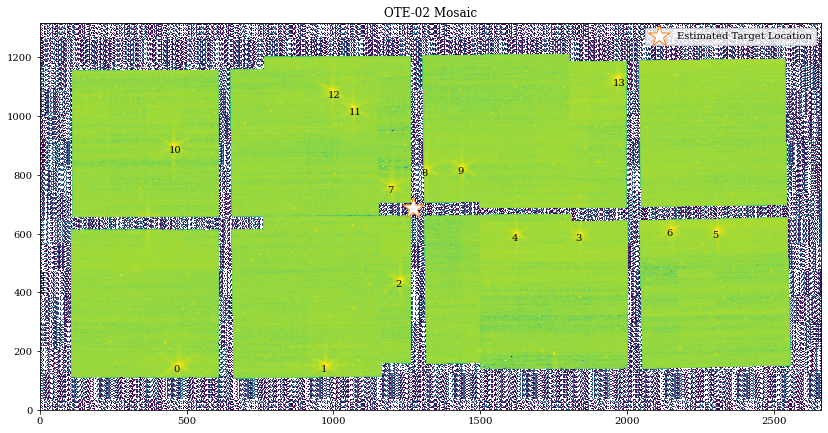

In [95]:
# Plot the full mosaic with the estimated target location and identified PSFs
notebook_utils.plot_mosaic_with_psfs(image, car, info_df['x'].values, info_df['y'].values, 
                                     target_location, xlim=None, ylim=None)

##### Trouble shooting

If you are finding hot pixels instead of PSFs, you can try replacing those pixel values with a positive number close to 0. You can do that with the following code (double click on this cell, then copy and paste the code section into a new cell that can be inserted by using the "+" in the menu at the top of the page):

```
hot_pixel_locations = [(1748, 192), ] # Add more points after the comma, x first, y second
for hot_pix in hot_pixel_locations:
    image[hot_pix[1], hot_pix[0]] = 3e-20
```

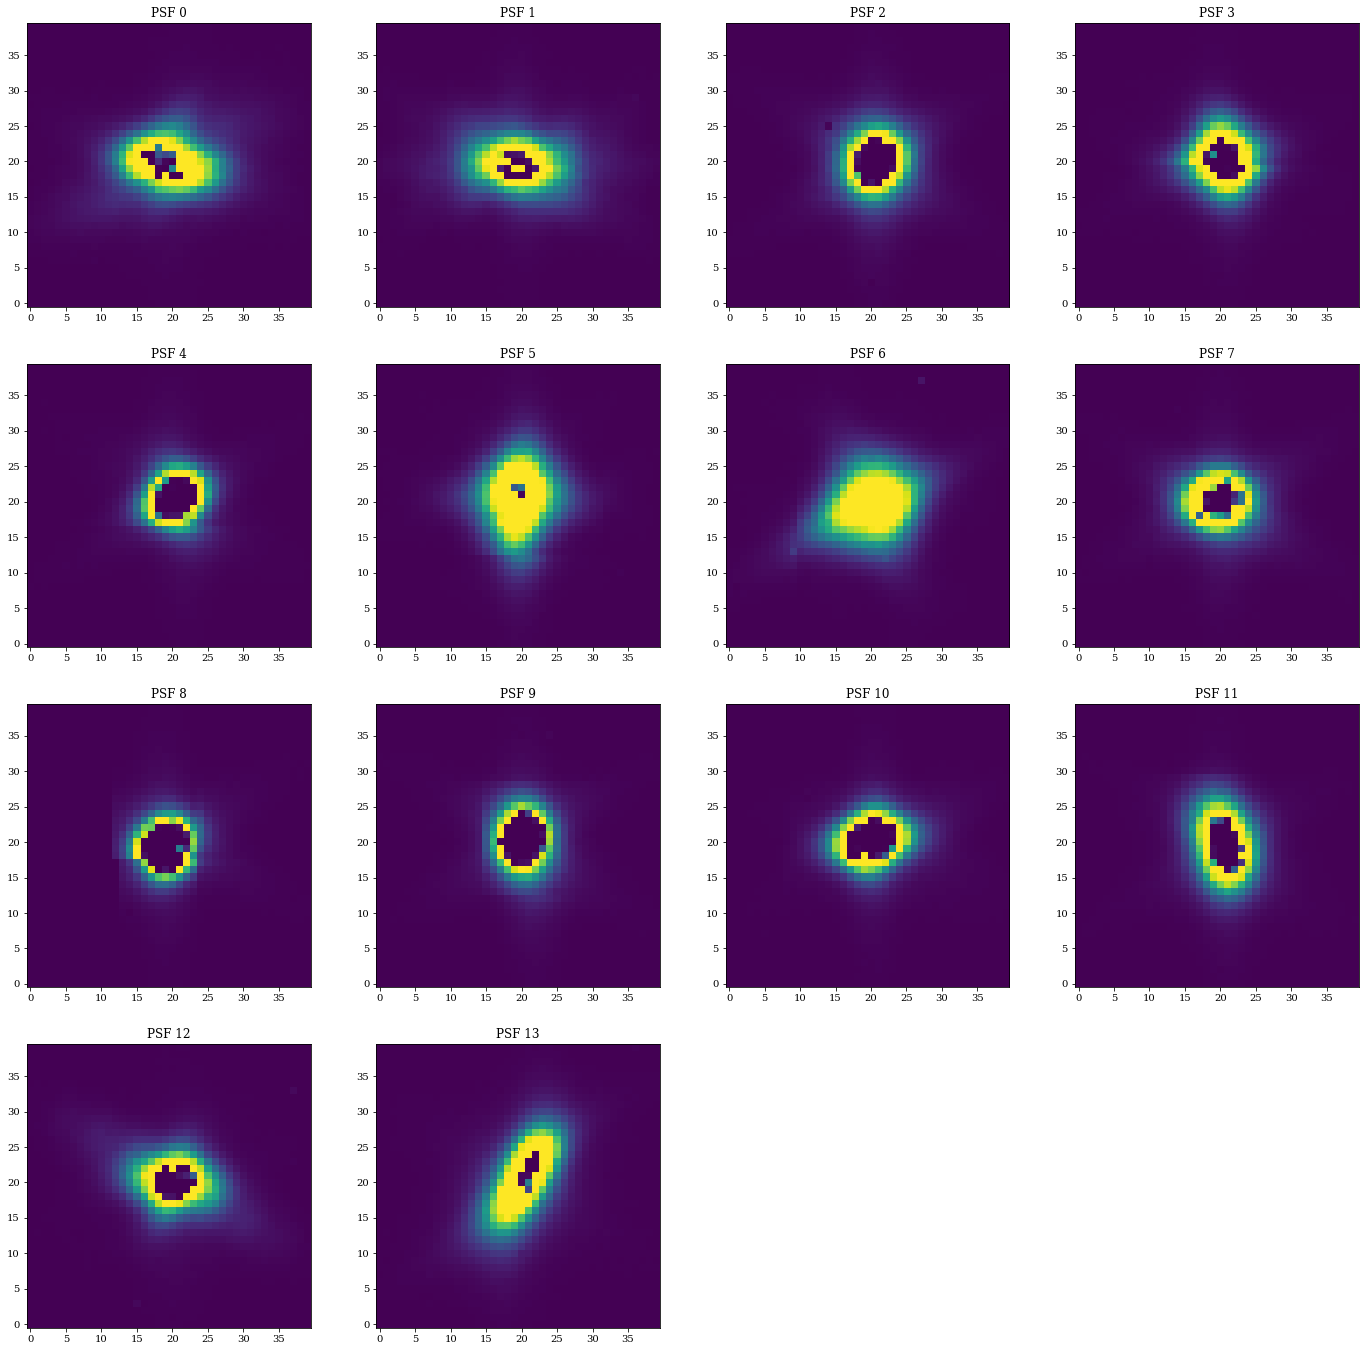

In [101]:
# Cut out each segment and do a visual check
# Change the size of the postage stamp cut out, by adjusting the window_size value which is the size of one side
notebook_utils.plot_each_identified_segment_psf(image, car, info_df['x'].values, info_df['y'].values, 
                                                window_size=40, num_psf_per_row=4)

### Things to look for:
- How many segment PSFs are saturated (zeros in the center of the PSF)?
- Is there a single birght spot in the PSF or are there multiple knots/lobes?


<font color='Tomato'> <div style='background-color: rgba(255, 99, 71, 0.3)'><center> 
##    
## Update the next cell (only) as needed
##    
</center></div></font>

In [102]:
# Which PSFs (list their number from the plots) would you consider guidable based on a visual inspection?
by_eye_good_inds = [0, 2, 3, 4, 7, 8, 9, 10, 11, 12]

## If provided, look at values provided by Shadow 

In [105]:
# Make a PSF location dictionary
if info_df is not None:
    info_dictionary = info_df.to_dict(orient='index')
else:
    info_dictionary = None

### First look at FWHM and Ellipticity 

In [111]:
notebook_utils.plot_multiple_parameters(['fwhm', 'ellipse'], info_dictionary)

Nothing to plot


Tally up how many of the above PSFs that are in the green for both FWHM and ellipse: 5 

In [120]:
# Indices of the better PSFs: 
# Change these values as needed
fwhm_limit = 15
ellipse_limit = 0.4 #TODO: Figure out if 0 or 1 is more circular - this is completely not clear from these PSFs


parameters = set(['fwhm', 'ellipse']) & set(info_dictionary.keys())
if not parameters:
    print('Nothing to compare. Relying on by-eye analysis')
    good_inds = by_eye_good_inds
else:
    good_inds = []
    for key in info_dictionary.keys():
        if info_dictionary[key]['fwhm'] < fwhm_limit and info_dictionary[key]['ellipse'] > ellipse_limit:
            good_inds.append(key)


Nothing to compare. Relying on by-eye analysis


In [121]:
good_inds

[0, 2, 3, 4, 7, 8, 9, 10, 11, 12]

### Compare "by eye" good PSFs to programmatic good PSFs 

In [122]:
good = list(set(by_eye_good_inds) & set(good_inds))

In [123]:
good

[0, 2, 3, 4, 7, 8, 9, 10, 11, 12]

If the number of "Good" PSFs is more than, or equal to 6, then we can feel confident that we can get a guiding scenario. If it is less than 6, then we will need OTE-03

In [125]:
if len(good) < 6:
    print(f'We only have {len(good_inds)} PSFs that we think are good enough for guiding. We need more than 6.')
else:
    print(f'We have {len(good_inds)} PSFs that we think are good enough for guiding, which might be enough.')

We have 10 PSFs that we think are good enough for guiding, which might be enough.


# After OTE 03

In [ ]:
# CAR information
car = 'OTE-03'
program_id = 1136

In [140]:
#########################################################
#### CELL TO EDIT - Get all of these from WSS Shadow ####
#########################################################

partial_view_of_deployment = os.path.join(main_directory, f'{car}/output/mosaic0_OTE-02-Obs1+2-SW.fits')

# Location of the file exported from QUIP
info_from_shadow = ''

# Define location of the target in the image
target_location = None

Now, we have a better idea of which segment is which, AND we have focus diversity. Here we will match the PSF in the images we have with their segment name, and then cut that out of the images that we have and put at their GA positions. This prepares us for OTE-07

In [ ]:
# These images are not down sampled, correct?
# Images at new SM location


# Images with SM at -400um


# Images with SM at +400um


In [192]:
#### CELL TO EDIT
# With the help of Shadow, determine which of the labelled PSFs are associated with a segment
# In the dictionary below, put the number from above BEFORE the ":" for each segment where Shadow thinks we have a
#  match. Delete any entries where the segment is unknown
matching_dictionary = { 1  :'A1-1', 
                        3  :'A2-2', 
                        6  :'A3-3', 
                        0  :'A4-4', 
                        7  :'A5-5', 
                        10 :'A6-6', 
                        4  :'B1-7',
                        5  :'B2-9', 
                        9  :'B3-11', 
                        8  :'B4-13', 
                        2  :'B5-15'#, 
#                         :'B6-17', 
#                         :'C1-8', 
#                         :'C2-10', 
#                         :'C3-12', 
#                         :'C4-14', 
#                         :'C5-16', 
#                         :'C6-18'
                      } 


In [283]:
# Match the location to the segment based on the matching dictionary

seg_location_dictionary = match_psf_params_to_segment(info_df, matching_dictionary, target_location)

In [292]:
# Put known segment postage stamps in large image array locations
box = 60
large_image_array = np.zeros([2048, 2048])

xs = []
ys = []
for seg in seg_location_dictionary.keys():
    mosaic_x, mosaic_y = seg_location_dictionary[seg]['location']
    psf = image[mosaic_y-box:mosaic_y+box, mosaic_x-box:mosaic_x+box]
    ga_x, ga_y = GA_PSF_LOCATIONS[seg]
    xs.append(ga_x)
    ys.append(ga_y)
    large_image_array[ga_y-box: ga_y+box, ga_x-box:ga_x+box] = psf

large_image_array[large_image_array<=0] = 3e-20

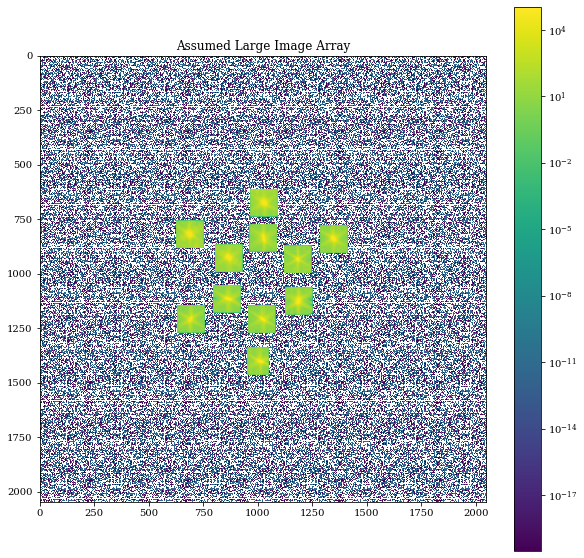

In [293]:
# plot out new image with distance color coded by how far from boresight
plt.figure(figsize=(10, 10))
plt.imshow(large_image_array, norm=LogNorm())
plt.title(f"Assumed Large Image Array")
plt.colorbar()
plt.show()

### Plot heat map of distances from estimated target location 

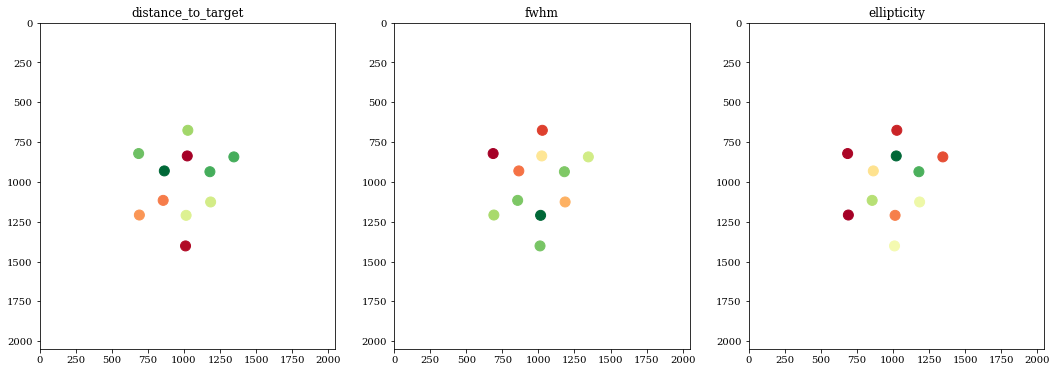

In [287]:
# Look at high level numbers
notebook_utils.plot_multiple_parameters(['distance_to_target', 'fwhm', 'ellipticity'], seg_location_dictionary, xs, ys)

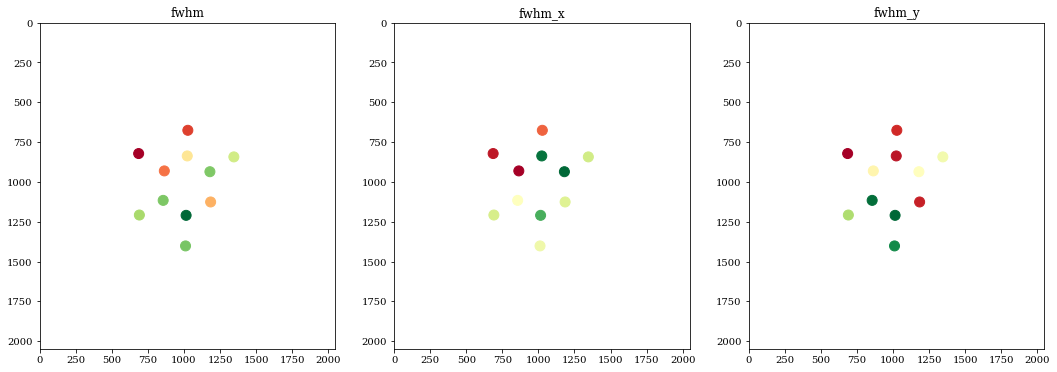

In [288]:
# Break down the FWHM further
notebook_utils.plot_multiple_parameters(['fwhm', 'fwhm_x', 'fwhm_y'], seg_location_dictionary, xs, ys)

# After OTE 04

In [1]:
# CAR information
car = 'OTE-04'
program_id = 1137

# After OTE 06

In [3]:
# CAR information
car = 'OTE-06'
program_id = 1140

# Get simulated NIRCam locations of LOS-02 PSFs 

In [8]:
los02_image = fits.getdata('/ifs/jwst/tel/LRE5/LOS-02/output/LRE5-RfR/jw01410002001_02101_00001_nrca3_cal.fits')

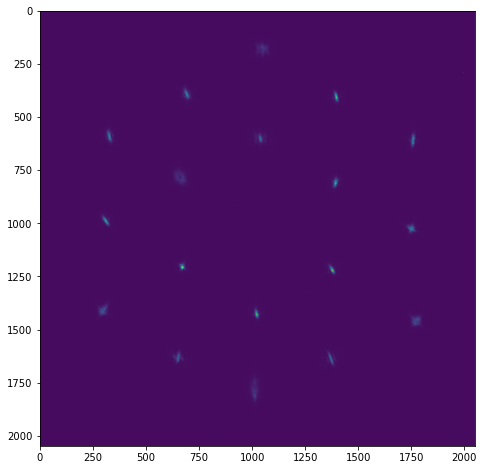

In [9]:
plt.figure(figsize=(10, 8))
plt.imshow(los02_image)

In [10]:
# mapping of magic segment labels to WSS numbers

# Do not change this cell

# MAGIC segment labels to segment naming map
SEGMENT_MAP_G1 = {"A":"B4-13", "B":"C4-14", "C":"C3-12", "D":"B5-15",
                  "E":"A4-4", "F":"B3-11", "G":"A5-5", "H":"A3-3", 
                  "I":"C5-16", "J":"C2-10", "K":"A6-6", "L":"A2-2", 
                  "M":"B6-17", "N":"A1-1", "O":"B2-9", "P":"C6-18", 
                  "Q":"C1-8", "R":"B1-7"}


SEGMENTS = ["A1-1", "A2-2", "A3-3", "A4-4", "A5-5", "A6-6", 
            "B1-7","B2-9", "B3-11", "B4-13", "B5-15", "B6-17", 
            "C1-8", "C2-10", "C3-12", "C4-14", "C5-16", "C6-18"]

In [16]:
guider = 1
segment_map = [SEGMENT_MAP_G1 if guider==1 else SEGMENT_MAP_G2][0]

In [18]:
# Make table
out_dir = '/Users/kbrooks/git_repos/jwst-magic-fork/out/'# +car+out/
root = 'test_los02'
all_psfs_filename = os.path.join(out_dir, root, 
                                 f'unshifted_all_found_psfs_{root}_G{guider}.txt')
all_psfs_table = pd.read_csv(all_psfs_filename, comment='#', 
                             names=['label', f'y', f'x', 
                                    f'countrate'], sep=' ')
segments = [segment_map[label] for label in all_psfs_table['label']]

# Add the segment name to the table
all_psfs_table.insert(1, 'segment', segments)
all_psfs_table = all_psfs_table.sort_values('segment', ascending=True)

In [23]:
all_psfs_locations = all_psfs_table[['segment', 'y','x']]

all_psfs_locations

,segment,y,x
8,A1-1,1015.0,1210.0
4,A2-2,856.0,1116.0
5,A3-3,864.0,931.0
9,A4-4,1023.0,837.0
12,A5-5,1180.0,936.0
13,A6-6,1185.0,1126.0
7,B1-7,1011.0,1402.0
1,B2-9,691.0,1208.0
0,B3-11,686.0,822.0
10,B4-13,1027.0,676.0


In [27]:
truth_locations = all_psfs_locations.set_index('segment').T.to_dict('list')
truth_locations

{'A1-1': [1015.0, 1210.0],
 'A2-2': [856.0, 1116.0],
 'A3-3': [864.0, 931.0],
 'A4-4': [1023.0, 837.0],
 'A5-5': [1180.0, 936.0],
 'A6-6': [1185.0, 1126.0],
 'B1-7': [1011.0, 1402.0],
 'B2-9': [691.0, 1208.0],
 'B3-11': [686.0, 822.0],
 'B4-13': [1027.0, 676.0],
 'B5-15': [1346.0, 843.0],
 'B6-17': [1335.0, 1213.0],
 'C1-8': [854.0, 1300.0],
 'C2-10': [695.0, 1019.0],
 'C3-12': [866.0, 742.0],
 'C4-14': [1188.0, 744.0],
 'C5-16': [1342.0, 1033.0],
 'C6-18': [1172.0, 1304.0]}

In [30]:
truth_locations == ga_psf_locations

True